In [32]:
import pandas as pd

In [33]:
import numpy as np

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
import seaborn as sns

In [36]:
iris =sns.load_dataset('iris')

In [37]:
from IPython.display import Image

In [38]:
url = 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg'

In [39]:
Image(url=url,height=200,width=200)

In [40]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


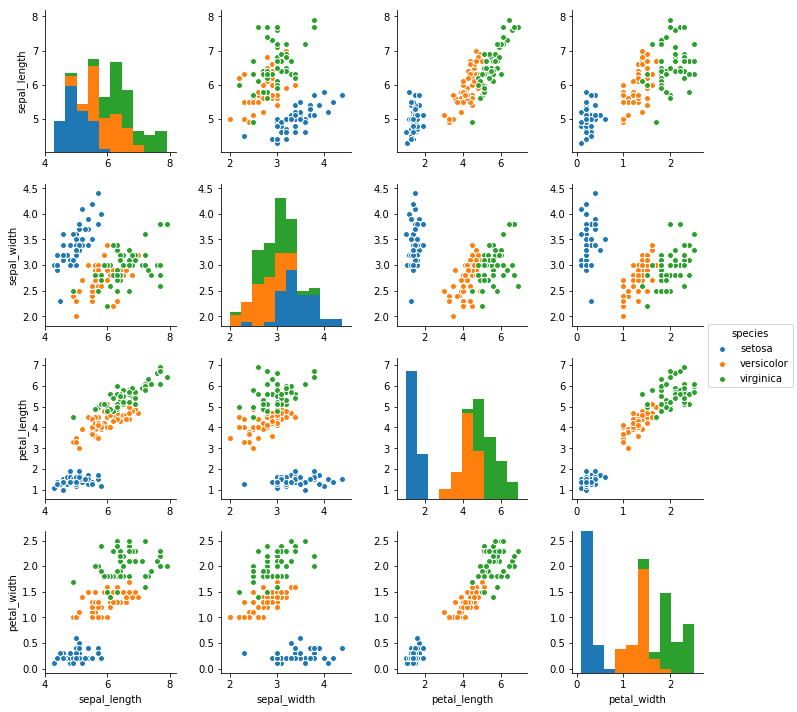

In [68]:
sns.pairplot(iris,hue='species')

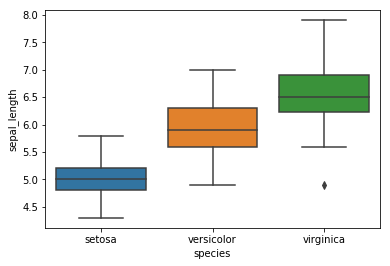

In [107]:
sns.boxplot(x='species',y='sepal_length',data=iris)

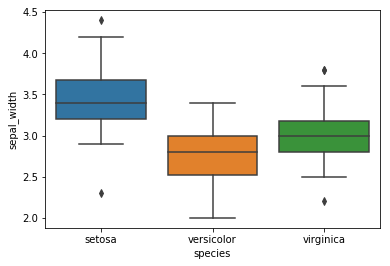

In [108]:
sns.boxplot(x='species',y='sepal_width',data=iris)

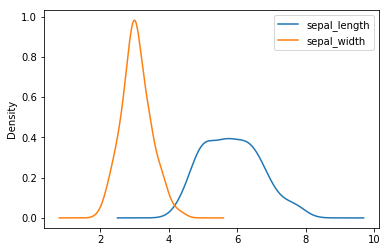

In [77]:
#Create a kde plot of sepal_length versus sepal width for setosa species of flower.
iris[['sepal_length','sepal_width']].plot(kind='kde')

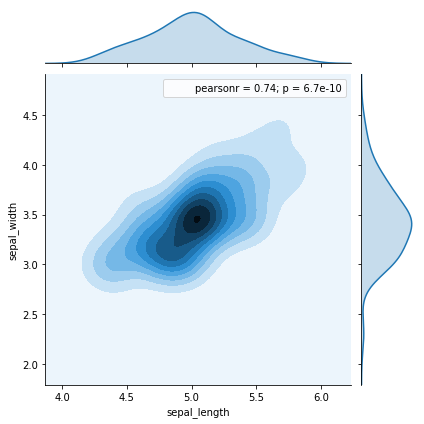

In [82]:
sns.jointplot(x='sepal_length',y='sepal_width',data=iris[iris['species']=='setosa'],kind='kde')

In [83]:
#getting data in to train test set

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X=iris.drop('species',axis=1)

In [86]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [87]:
y=iris['species']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [135]:
#import scikit learn model 
#here i m using svm classificaton

In [136]:
from sklearn.svm import SVC

In [137]:
svm=SVC()

In [138]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [139]:
y_pred=svm.predict(X_test)

In [140]:
#performance and classification evauation

In [141]:
from sklearn.metrics import classification_report,confusion_matrix

In [142]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        29
 versicolor       0.96      1.00      0.98        23
  virginica       1.00      0.96      0.98        23

avg / total       0.99      0.99      0.99        75



[[29  0  0]
 [ 0 23  0]
 [ 0  1 22]]


Gridsearch for more precision

In [143]:
from sklearn.grid_search import GridSearchCV

In [144]:
param_grid={'C':[0.1,1,10,0.01],'gamma':[1,10,0.001,0.1]}

In [145]:
grid=GridSearchCV(SVC(),param_grid,verbose=10)

In [146]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.920000 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=1.000000 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.840000 -   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ........................ C=0.1, gamma=10, score=0.600000 -   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ........................ C=0.1, gamma=10, score=0.440000 -   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ........................ C=0.1, gamma=10, score=0.600000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 0.01], 'gamma': [1, 10, 0.001, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [147]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [148]:
grid_pred=grid.predict(X_test)

In [149]:
print(classification_report(y_test,grid_pred))
print('\n')
print(confusion_matrix(y_test,grid_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        29
 versicolor       0.92      1.00      0.96        23
  virginica       1.00      0.91      0.95        23

avg / total       0.98      0.97      0.97        75



[[29  0  0]
 [ 0 23  0]
 [ 0  2 21]]
